<a href="https://colab.research.google.com/github/lauraluebbert/PhD_thesis/blob/main/Chapter1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import time
from bs4 import BeautifulSoup
import re
from datetime import datetime
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# Chapter 1 - Introduction

### Load data
The following overview of scRNAseq tools was downloaded from the [scRNA-tools](https://www.scrna-tools.org/table) website on Februaray 10th, 2024:

In [ ]:
# Downlaod copy of database stored on GitHub
!wget https://raw.githubusercontent.com/lauraluebbert/PhD_thesis/main/files/2-10-2024_scRNA_tools.csv

--2024-02-19 03:33:22--  https://raw.githubusercontent.com/lauraluebbert/PhD_thesis/main/files/2-10-2024_scRNA_tools.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 489022 (478K) [text/plain]
Saving to: ‘2-10-2024_scRNA_tools.csv’

2-10-2024_scRNA_too 100%[===================>] 477.56K  --.-KB/s    in 0.04s   

2024-02-19 03:33:23 (10.6 MB/s) - ‘2-10-2024_scRNA_tools.csv’ saved [489022/489022]



In [ ]:
tool_df = pd.read_csv("2-10-2024_scRNA_tools.csv")
tool_df

,Name,Platform,DOIs,Pub Dates,Citations,Code,Description,License,Categories,Updated
0,acorde,R,"10.1038/s41467-022-29497-w, 10.1101/2021.05.07...","2022-04-05, NA",8,https://github.com/ConesaLab/acorde,Isoform co-usage networks from single-cell RNA...,GPL-3.0,"Alternative Splicing, Differential Expression,...",2022-04-30
1,ACTINN,Python,"10.1093/bioinformatics/btz592, 10.1101/532093","2019-07-29, NA",128,https://github.com/mafeiyang/ACTINN,ACTINN (Automated Cell Type Identification usi...,GPL-3.0,Classification,2021-06-28
2,ACTION,C++/R/MATLAB,"10.1038/s41467-018-03933-2, 10.1101/081273","2018-04-17, NA",44,http://compbio.mit.edu/ACTION,ACTION infers the functional identity of cells...,'-,"Clustering, Dimensionality Reduction, Gene Net...",2021-06-28
3,ACTIONet,R/C++,"10.1038/s41467-020-18416-6, 10.1101/746339","2020-10-26, NA",34,https://github.com/shmohammadi86/ACTIONet,Robust multi-resolution analysis of single-cel...,GPL-2.0-or-later,"Classification, Clustering, Dimensionality Red...",2021-06-11
4,ACTIVA,Python,"10.1093/bioinformatics/btac095, 10.1101/2021.0...","2022-02-18, NA",13,https://github.com/SindiLab/ACTIVA,Realistic scRNAseq Generation with Automatic C...,MIT,Simulation,2022-03-04
...,...,...,...,...,...,...,...,...,...,...
1701,ZINB-WaVE,R,"10.1038/s41467-017-02554-5, 10.1101/125112, 10...","2018-01-18, NA, NA, NA, 2018-02-26",677,https://github.com/drisso/zinbwave,Zero-inflated Negative Binomial based Wanted V...,'-,"Dimensionality Reduction, Normalisation, Simul...",2019-10-02
1702,ZINBAE,Python,10.1016/j.ymeth.2020.09.010,2021-08,10,https://github.com/ttgump/ZINBAE,Zero-Inflated Negative Binomial (ZINB) model-b...,MIT,Imputation,2020-10-05
1703,ZINBMM,R,10.1186/s13059-023-03046-0,2023-09-11,0,https://github.com/mengyunwu2020/ZINBMM,A Zero-Inflated Negative Binomical mixture mod...,GPL-2.0,"Clustering, Marker Genes",2023-09-15
1704,zingeR,R,"10.1101/157982, 10.1186/s13059-018-1406-4","NA, 2018-02-26",167,https://github.com/statOmics/zingeR,zingeR: Zero-Inflated Negative binomial Gene E...,'-,"Differential Expression, Simulation",2017-07-03


In [ ]:
len(tool_df[tool_df["Citations"] == "'-"])

107

Create clean publication year number:

In [ ]:
# Get years only
years = []
mylist = tool_df["Pub Dates"].astype(str)
for l in mylist:
    match = re.match(r'.*([1-3][0-9]{3})', l)
    if match is not None:
      # Only keep year first published
      years.append(match.group(1))
    else:
      years.append(np.nan)


tool_df["Year"] = years

In [ ]:
dates_clean = []
for i in tool_df["Pub Dates"].values.astype(str):
  # Remove "NA" string from dates
  i = i.replace("NA, ", "")
  i = i.replace("NA,", "")
  i = i.replace(", NA", "")
  i = i.replace("NA", "")

  # Only keep date first published
  i = i.split(",")[0]

  dates_clean.append(i)

In [ ]:
tool_df["pub_date_clean"] = dates_clean

Check which tools are available from PyPI:

In [ ]:
pip_ins = []
bioconda_ins = []
for program in tool_df["Name"].values:
  program = program.lower()

  # Check if software is available on PyPI
  r = requests.get(f"https://pypi.org/project/{program}/")
  if r.status_code == 200:
    pip_ins.append(True)
  else:
    pip_ins.append(False)

  # Check if software is available on Anaconda
  r2 = requests.get(f"https://anaconda.org/bioconda/{program}")
  if r2.status_code == 200:
    html = r2.text
    soup = BeautifulSoup(html)
    if program.capitalize() in str(soup.find("title")):
      bioconda_ins.append(True)
    else:
      bioconda_ins.append(False)
  else:
    bioconda_ins.append(False)

In [ ]:
tool_df["pypi"] = pip_ins
tool_df["bioconda"] = bioconda_ins

___
## Plot citations over publication date for each tool and color by PyPI availability:

In [ ]:
# Remove tools that were not published and change citations to int
tool_df_tmp = tool_df[(tool_df["Citations"] != "'-") & (tool_df["Year"].notnull())]
tool_df_tmp = tool_df_tmp[tool_df_tmp["Platform"].str.contains("Python")]

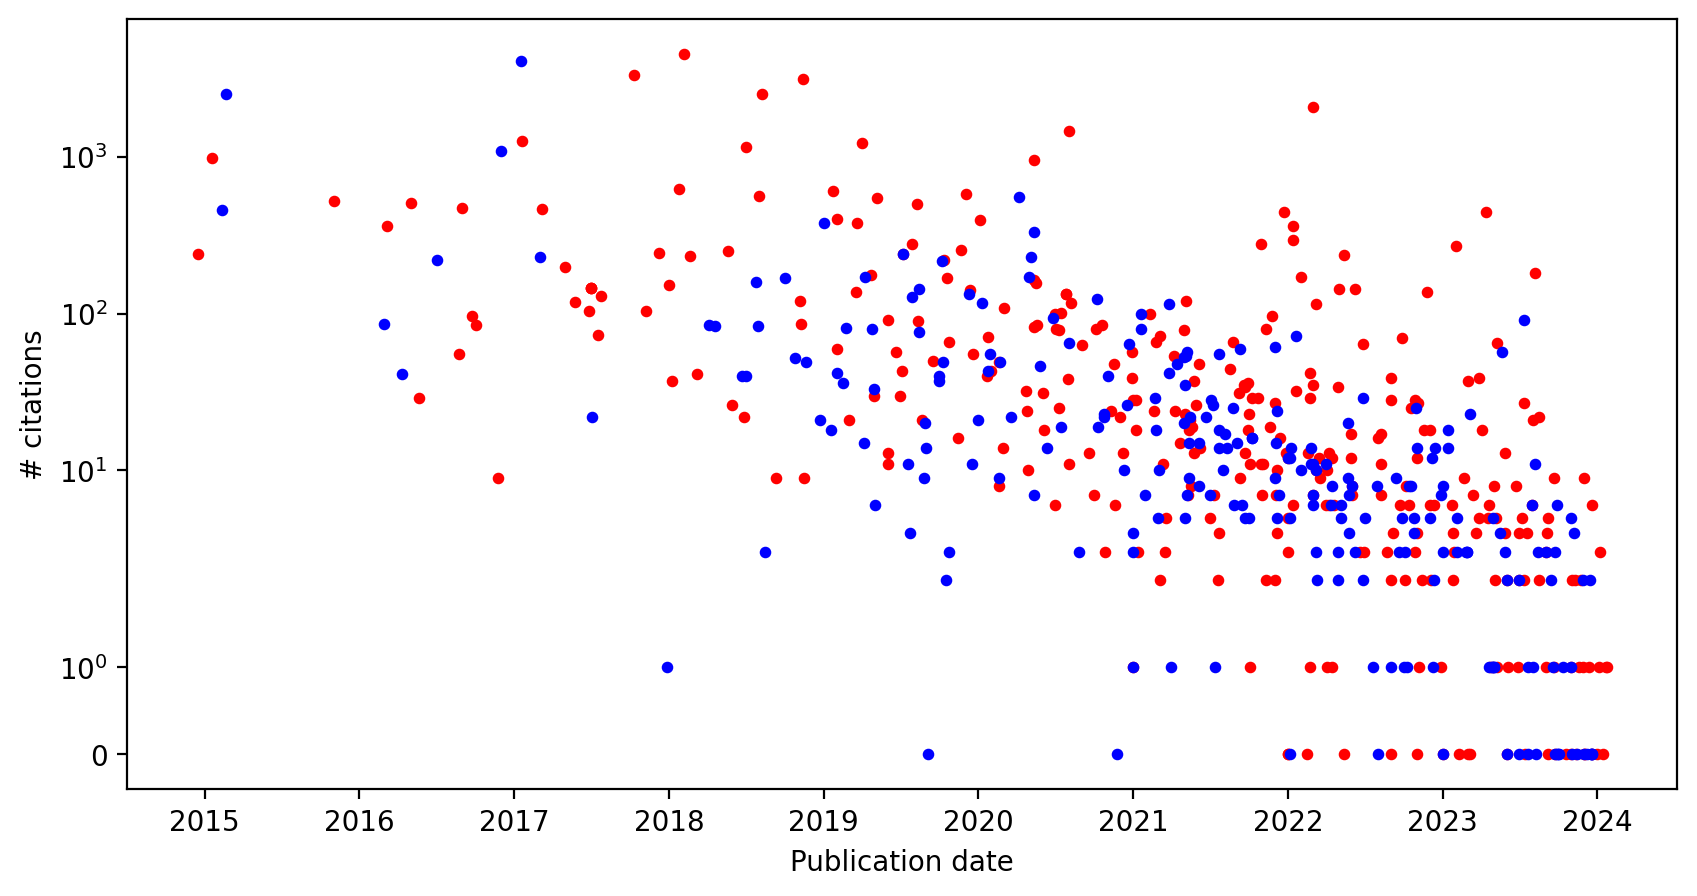

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

s = 10

tmp_df = tool_df_tmp[(tool_df_tmp["pypi"] == True) | (tool_df_tmp["bioconda"] == True)]
# tmp_df = tool_df_tmp[tool_df_tmp["pypi"] == True]
x = pd.to_datetime(tmp_df["pub_date_clean"].values)
y = tmp_df["Citations"].astype(int)
ax.scatter(x, y, s=s, color="red", label="True")

tmp_df = tool_df_tmp[(tool_df_tmp["pypi"] == False) & (tool_df_tmp["bioconda"] == False)]
# tmp_df = tool_df_tmp[tool_df_tmp["pypi"] == False]
x = pd.to_datetime(tmp_df["pub_date_clean"].values)
y = tmp_df["Citations"].astype(int)
ax.scatter(x, y, s=s, color="blue", label="False")

ax.set_ylabel("# citations")
ax.set_xlabel("Publication date")

ax.set_yscale("symlog")
# ax.set_ylim(0, 500)

fig.show()

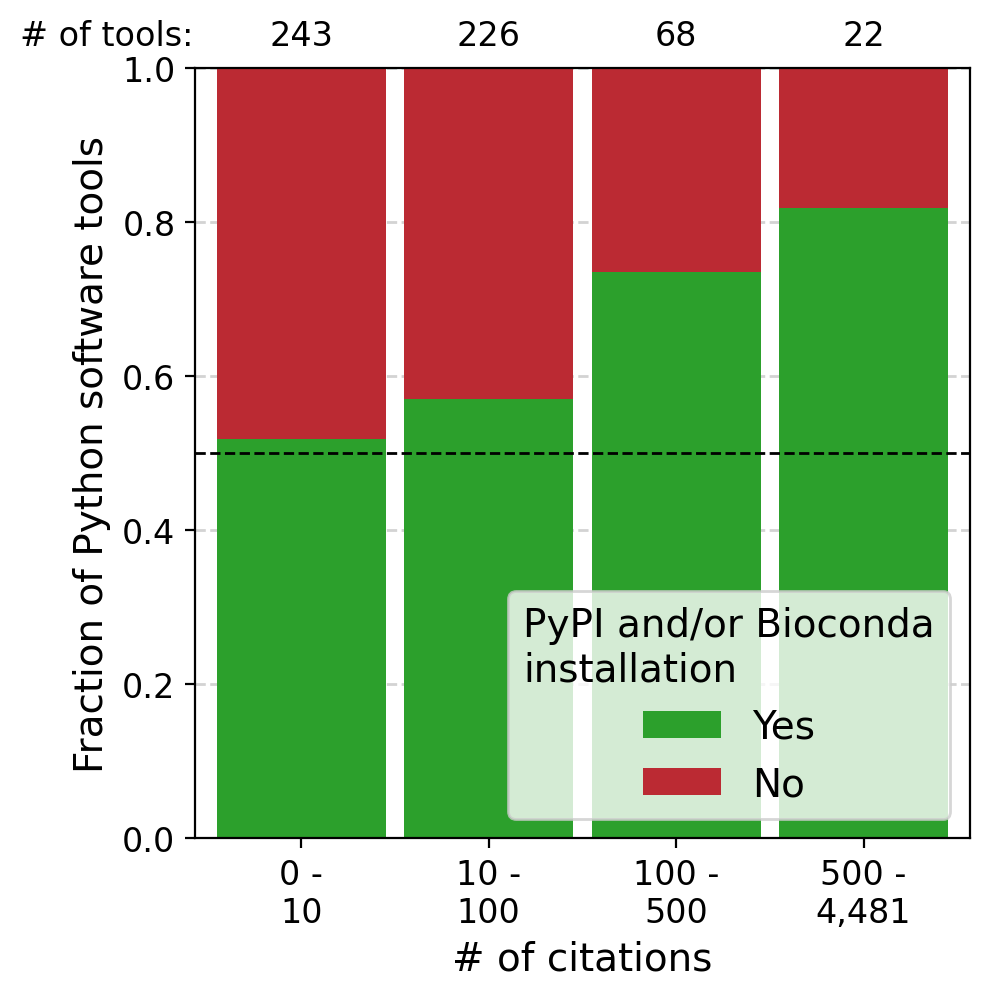

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
fontsize = 14
color1 = "tab:green"
color2 = "#bb2a33"
width = 0.9

ranges = [
    [0,10],
    [10, 100],
    [100, 500],
    [500, np.max(tool_df_tmp["Citations"].astype(int))],
]

for i, range in enumerate(ranges):
  total = len(tool_df_tmp[(tool_df_tmp["Citations"].astype(int) >= range[0]) & (tool_df_tmp["Citations"].astype(int) < range[1])])

  y1 = len(tool_df_tmp[((tool_df_tmp["pypi"] == True) | (tool_df_tmp["bioconda"] == True)) & (tool_df_tmp["Citations"].astype(int) >= range[0]) & (tool_df_tmp["Citations"].astype(int) < range[1])]) / total
  # y1 = len(tool_df_tmp[(tool_df_tmp["pypi"] == True) & (tool_df_tmp["Citations"].astype(int) >= range[0]) & (tool_df_tmp["Citations"].astype(int) < range[1])]) / total
  ax.bar(i, y1, color=color1, label="Yes" if i==0 else None, width=width)

  y2 = len(tool_df_tmp[(tool_df_tmp["pypi"] == False) & (tool_df_tmp["bioconda"] == False) & (tool_df_tmp["Citations"].astype(int) >= range[0]) & (tool_df_tmp["Citations"].astype(int) < range[1])]) / total
  # y2 = len(tool_df_tmp[(tool_df_tmp["pypi"] == False) & (tool_df_tmp["Citations"].astype(int) >= range[0]) & (tool_df_tmp["Citations"].astype(int) < range[1])]) / total
  ax.bar(i, y2, bottom=y1, color=color2, label="No" if i==0 else None, width=width)

  # Add total number of tools above bars
  ax.text(i, 1.03, total, fontsize=fontsize-2, ha="center")

ax.text(-1.5, 1.03, "# of tools:", fontsize=fontsize-2)

ax.set_ylim(0,1)

ax.legend(title="PyPI and/or Bioconda\ninstallation", fontsize=fontsize, title_fontsize=fontsize, loc="lower right")

ax.set_xticks(np.arange(len(ranges)), [" -\n".join([str('{:,}'.format(int(i[0]))), str('{:,}'.format(int(i[1])))]) for i in ranges])
ax.set_ylabel("Fraction of Python software tools", fontsize=fontsize)
ax.set_xlabel("# of citations", fontsize=fontsize)

ax.tick_params(axis="both", labelsize=fontsize-2)
ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.margins(x=0.03)

ax.axhline(0.5, lw=1, color="black", ls="--")

fig.savefig("pypi_fractions.png", dpi=300, bbox_inches="tight")

fig.show()

## Plot histogram of the number of citations for each tool:

In [ ]:
# Only keep tools published before 2023 so they had one year to get citations
tool_df_short = tool_df[tool_df["Year"].notnull()]
tool_df_short["Year"] = tool_df_short["Year"].astype(int)
tool_df_short = tool_df_short[tool_df_short["Year"] < 2023]

# Remove tools that were not published and change citations to int
tool_df_short = tool_df_short[tool_df_short["Citations"] != "'-"]
tool_df_short["Citations"] = tool_df_short["Citations"].astype(int)

tool_df_short

<ipython-input-13-62dedd7494c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tool_df_short["Year"] = tool_df_short["Year"].astype(int)


,Name,Platform,DOIs,Pub Dates,Citations,Code,Description,License,Categories,Updated,Year,pub_date_clean,pypi,bioconda
0,acorde,R,"10.1038/s41467-022-29497-w, 10.1101/2021.05.07...","2022-04-05, NA",8,https://github.com/ConesaLab/acorde,Isoform co-usage networks from single-cell RNA...,GPL-3.0,"Alternative Splicing, Differential Expression,...",2022-04-30,2022,2022-04-05,False,False
1,ACTINN,Python,"10.1093/bioinformatics/btz592, 10.1101/532093","2019-07-29, NA",128,https://github.com/mafeiyang/ACTINN,ACTINN (Automated Cell Type Identification usi...,GPL-3.0,Classification,2021-06-28,2019,2019-07-29,False,False
2,ACTION,C++/R/MATLAB,"10.1038/s41467-018-03933-2, 10.1101/081273","2018-04-17, NA",44,http://compbio.mit.edu/ACTION,ACTION infers the functional identity of cells...,'-,"Clustering, Dimensionality Reduction, Gene Net...",2021-06-28,2018,2018-04-17,True,False
3,ACTIONet,R/C++,"10.1038/s41467-020-18416-6, 10.1101/746339","2020-10-26, NA",34,https://github.com/shmohammadi86/ACTIONet,Robust multi-resolution analysis of single-cel...,GPL-2.0-or-later,"Classification, Clustering, Dimensionality Red...",2021-06-11,2020,2020-10-26,True,False
4,ACTIVA,Python,"10.1093/bioinformatics/btac095, 10.1101/2021.0...","2022-02-18, NA",13,https://github.com/SindiLab/ACTIVA,Realistic scRNAseq Generation with Automatic C...,MIT,Simulation,2022-03-04,2022,2022-02-18,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,ZIFA,Python,10.1186/s13059-015-0805-z,2015-11-02,520,https://github.com/epierson9/ZIFA,Zero-inflated dimensionality reduction algorit...,MIT,Dimensionality Reduction,2016-12-22,2015,2015-11-02,False,True
1701,ZINB-WaVE,R,"10.1038/s41467-017-02554-5, 10.1101/125112, 10...","2018-01-18, NA, NA, NA, 2018-02-26",677,https://github.com/drisso/zinbwave,Zero-inflated Negative Binomial based Wanted V...,'-,"Dimensionality Reduction, Normalisation, Simul...",2019-10-02,2018,2018-01-18,False,False
1702,ZINBAE,Python,10.1016/j.ymeth.2020.09.010,2021-08,10,https://github.com/ttgump/ZINBAE,Zero-Inflated Negative Binomial (ZINB) model-b...,MIT,Imputation,2020-10-05,2021,2021-08,False,False
1704,zingeR,R,"10.1101/157982, 10.1186/s13059-018-1406-4","NA, 2018-02-26",167,https://github.com/statOmics/zingeR,zingeR: Zero-Inflated Negative binomial Gene E...,'-,"Differential Expression, Simulation",2017-07-03,2018,2018-02-26,False,False


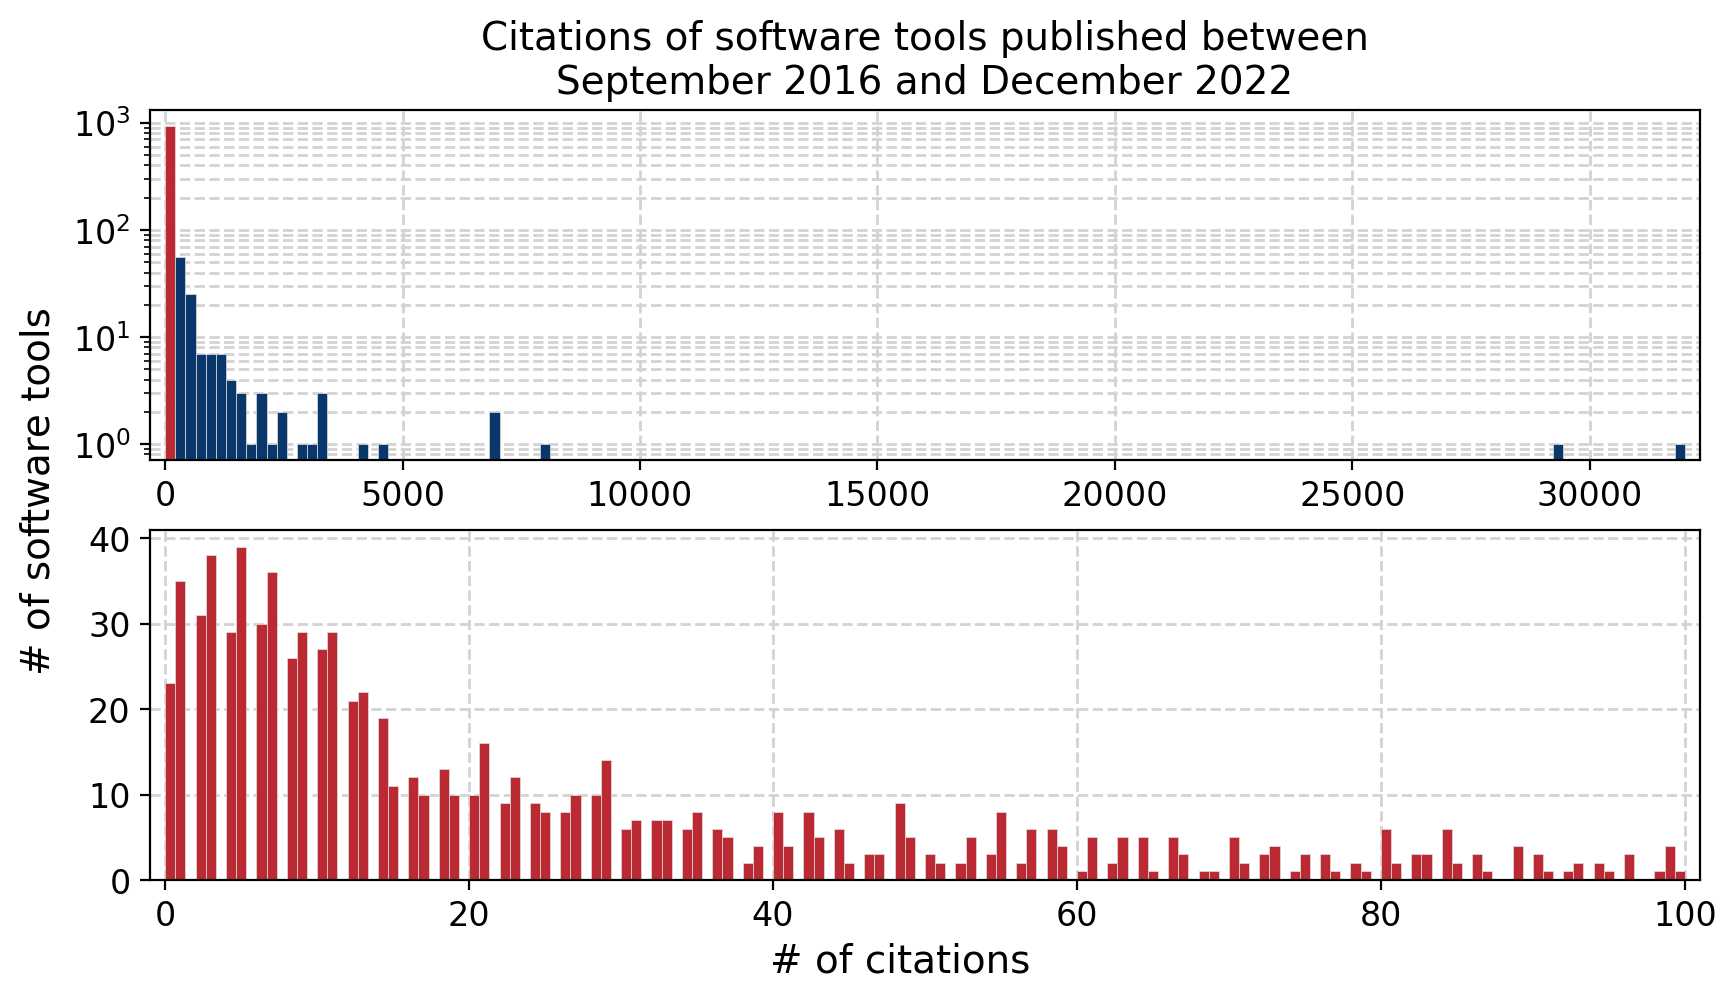

In [ ]:
fig,axs = plt.subplots(figsize=(10,5), nrows = 2)
fontsize = 14

max_second_plot = 100

## Plot all tools
ax = axs[0]
cit_nums = tool_df_short["Citations"].values

# bins = np.max(cit_nums)
bins = 150
n, bins, patches = ax.hist(cit_nums, bins=bins, facecolor='#09376c', edgecolor='#e0e0e0', linewidth=0.25, alpha=1)

# # Add colormap to bins
# n = n.astype('int')
# for i in np.arange(len(patches)):
#     patches[i].set_facecolor(plt.cm.RdBu_r(n[i]/max(n)))

# Make <= [max_second_plot] citations bins stand out
for i in np.arange(sum(bins < max_second_plot)):
  patches[i].set_fc('#bb2a33')

ax.set_yscale("log")
ax.set_title(f"Citations of software tools published between\nSeptember 2016 and December 2022", fontsize=fontsize)

## Plot tools with less than / equal to [max_second_plot] citations
ax = axs[1]
cit_nums = tool_df_short[tool_df_short["Citations"] <= max_second_plot]["Citations"].values

# bins = np.max(cit_nums)
bins = 150
n, bins, patches = ax.hist(cit_nums, bins=bins, facecolor='#bb2a33', edgecolor='#e0e0e0', linewidth=0.25, alpha=1)

# # Add colormap to bins
# n = n.astype('int')
# for i in np.arange(len(patches)):
#     patches[i].set_facecolor(plt.cm.RdBu_r(n[i]/max(n)))

# ax.set_xlabel("# of citations", fontsize=fontsize)

fig.supxlabel("# of citations", fontsize=fontsize)
fig.supylabel("# of software tools", fontsize=fontsize, x=0.06)

for ax in axs:
  ax.tick_params(axis="both", labelsize=fontsize-2)
  ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
  ax.set_axisbelow(True)
  ax.margins(x=0.01)

fig.savefig("citations_histograms.png", dpi=300, bbox_inches="tight")

fig.show()

In [ ]:
tool_df_short["Citations"] = tool_df_short["Citations"].astype(int)

total = len(tool_df_short)
no_cits = len(tool_df_short[tool_df_short["Citations"] == 0])
range = len(tool_df_short[tool_df_short["Citations"] < 20])
range1 = len(tool_df_short[tool_df_short["Citations"] < 100])
range2 = len(tool_df_short[tool_df_short["Citations"] > 100])
range3 = len(tool_df_short[tool_df_short["Citations"] > 1000])

print(f"# of published tools: {total}")
print(f"# of tools with 0 citations: {int(no_cits)} ({int((no_cits/total)*100)}%)")
print(f"# of tools with < 20 citations: {int(range)} ({int((range/total)*100)}%)")
print(f"# of tools with < 100 citations: {int(range1)} ({int((range1/total)*100)}%)")
print(f"# of tools with > 100 citations: {int(range2)} ({int((range2/total)*100)}%)")
print(f"# of tools with > 1000 citations: {int(range3)} ({int((range3/total)*100)}%)")

# of published tools: 1065
# of tools with 0 citations: 23 (2%)
# of tools with < 20 citations: 490 (46%)
# of tools with < 100 citations: 850 (79%)
# of tools with > 100 citations: 214 (20%)
# of tools with > 1000 citations: 35 (3%)


In [ ]:
# Save table containing tools with over 1000 citations
df = tool_df_short[tool_df_short["Citations"] > 1000].sort_values("Citations", ascending=False)
df.to_csv("tmp.csv")

In [ ]:
tool_df_short.sort_values("Citations", ascending=False)

,Name,Platform,DOIs,Pub Dates,Citations,Code,Description,License,Categories,Updated,Year,pub_date_clean,pypi,bioconda
1546,STAR,C/C++,"10.1093/bioinformatics/bts635, 10.1101/2021.05...","2012-10-25, NA",32005,https://github.com/alexdobin/STAR,"STARsolo: mapping, demultiplexing and gene qua...",MIT,"Alignment, Quantification, UMIs",2021-06-28,2012,2012-10-25,True,True
1430,Seurat,R,"10.1016/j.cell.2019.05.031, 10.1016/j.cell.202...","2019-06, 2021-06, 2015-04-13, 2018-04-02, 2023...",29316,https://github.com/satijalab/seurat,It contains easy-to-use implementations of com...,GPL-3.0,"Clustering, Differential Expression, Dimension...",2024-01-05,2019,2019-06,True,False
744,Monocle,R,"10.1038/nbt.2859, 10.1038/nmeth.4150, 10.1038/...","2014-03-23, 2017-01-23, 2017-08-21, NA",7912,https://github.com/cole-trapnell-lab/monocle-r...,Differential expression and time-series analys...,Artistic-2.0,"Clustering, Differential Expression, Dimension...",2018-03-14,2017,2014-03-23,True,False
955,salmon,C++,"10.1038/nmeth.4197, 10.1093/bioinformatics/bta...","2017-03-06, 2020-07-13, NA, NA, NA, 2019-03-27",7030,https://github.com/COMBINE-lab/salmon,Salmon produces transcript-level quantificatio...,GPL-3.0,"Quantification, UMIs",2020-04-14,2019,2017-03-06,True,True
639,kallisto,C/C++,"10.1038/nbt.3519, 10.1038/s41587-021-00870-2, ...","2016-04-04, 2021-04-01, 2019-01-21, NA, NA, NA...",7011,https://github.com/pachterlab/kallisto,kallisto produces transcript-level quantificat...,BSD-2-Clause,"Quantification, UMIs",2023-11-24,2019,2016-04-04,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,RNA-combine,Python/Shell/R,10.1186/s12859-021-04549-y,2022-01-06,0,https://github.com/dongxuemin666/RNA-combine,A toolkit for comprehensive analysis on multip...,MIT,"Alignment, Classification, Clustering, Dimensi...",2022-01-14,2022,2022-01-06,False,False
461,fasthplus,R,"10.1093/biostatistics/kxac035, 10.1101/2022.02...","2022-09-05, NA",0,https://github.com/ntdyjack/fasthplus,The fasthplus R package provides fast approxim...,CC-BY-4.0,Clustering,2023-01-04,2022,2022-09-05,False,False
733,MitoHEAR,R,10.21105/joss.04265,2022-06-01,0,https://github.com/ScialdoneLab/MitoHEAR,MitoHEAR (Mitochondrial HEteroplasmy AnalyzeR)...,GPL-3.0,"Clustering, Variants, Visualisation",2022-06-10,2022,2022-06-01,False,False
812,OmicInt,R,10.1016/j.ailsci.2021.100025,2021-12,0,https://github.com/AusteKan/OmicInt,OmicInt is an R package developed for an in-de...,GPL-3.0,"Gene Networks, Visualisation",2021-12-17,2021,2021-12,False,False


## Visualize whether tools were updated since their first released
Get dates of last GitHub commit to code repositories as an indication of last update to the software:

In [ ]:
# Add a personal GitHub token as described here:
# https://docs.github.com/en/enterprise-server@3.9/authentication/keeping-your-account-and-data-secure/managing-your-personal-access-tokens
# There is no need to select access scopes for this token as it is only used to identify the GitHub user
# Identification increases the server rate limit form 60 to 5,000 requests per hour
token = "YOUR_GITHUB_TOKEN"

In [ ]:
def get_last_commit_dates(username_repository_pairs, github_token):
    query_template = '''
    query {
      repository(owner: "%s", name: "%s") {
        defaultBranchRef {
          target {
            ... on Commit {
              committedDate
            }
          }
        }
      }
    }
    '''

    headers = {
        'Authorization': f'Bearer {github_token}',
    }

    last_commit_dates = {}

    for username, repository in username_repository_pairs:
        query = query_template % (username, repository)
        url = 'https://api.github.com/graphql'

        try:
            response = requests.post(url, json={'query': query}, headers=headers)
            response.raise_for_status()
            data = response.json()

            if 'data' in data and 'repository' in data['data'] and 'defaultBranchRef' in data['data']['repository']:
                last_commit_date = data['data']['repository']['defaultBranchRef']['target']['committedDate']
                last_commit_dates[(username, repository)] = last_commit_date
            else:
                last_commit_dates[(username, repository)] = np.nan

        # Catch server error
        except requests.exceptions.RequestException as e:
          print(f"Error for {username}/{repository}: {e}")
          last_commit_dates[(username, repository)] = np.nan
        # Catch other errors
        except:
          last_commit_dates[(username, repository)] = np.nan

    return last_commit_dates

In [ ]:
username_repository_pairs = []
for repo in tool_df_short["Code"].values:
  try:
    username = repo.split("/")[-2]
    repository = repo.split("/")[-1]
    username_repository_pairs.append((username, repository))
    tool_names.append(tool)

  # Skip tools without a GitHub code repository
  except:
    continue

In [ ]:
len(set(username_repository_pairs))

1052

In [ ]:
%%time
last_commit_dates = get_last_commit_dates(username_repository_pairs, token)

CPU times: user 1min 15s, sys: 1.11 s, total: 1min 16s
Wall time: 3min 32s


In [ ]:
# Get program names and original release dates
tool_names = []
pub_dates = []
cits = []
for key in last_commit_dates.keys():
  tool_names.append(tool_df_short[(tool_df_short["Code"].notnull()) & (tool_df_short["Code"].str.contains(key[0] + "/" + key[1]))]["Name"].values[0])
  pub_dates.append(tool_df_short[(tool_df_short["Code"].notnull()) & (tool_df_short["Code"].str.contains(key[0] + "/" + key[1]))]["pub_date_clean"].values[0])
  cits.append(tool_df_short[(tool_df_short["Code"].notnull()) & (tool_df_short["Code"].str.contains(key[0] + "/" + key[1]))]["Citations"].values[0])

In [ ]:
df_commits = pd.DataFrame()
df_commits["name"] = tool_names
df_commits["pub_date"] = pub_dates
df_commits["citations"] = cits
df_commits["last_commit"] = last_commit_dates.values()
# Only keep programs for which we have a last commit date
df_commits = df_commits[df_commits["last_commit"].notnull()]
df_commits["last_commit_clean"] = [value.split("T")[0] for value in df_commits["last_commit"]]
df_commits

,name,pub_date,citations,last_commit,last_commit_clean
0,acorde,2022-04-05,8,2023-01-20T19:46:38Z,2023-01-20
1,ACTINN,2019-07-29,128,2021-04-09T15:49:55Z,2021-04-09
3,ACTIONet,2020-10-26,34,2022-12-01T04:07:48Z,2022-12-01
4,ACTIVA,2022-02-18,13,2023-01-23T20:51:32Z,2023-01-23
5,activeSVC,2022-06,8,2022-04-24T22:21:17Z,2022-04-24
...,...,...,...,...,...
1047,ZIFA,2015-11-02,520,2020-06-02T17:50:18Z,2020-06-02
1048,ZINB-WaVE,2018-01-18,677,2021-09-21T09:41:56Z,2021-09-21
1049,ZINBAE,2021-08,10,2023-04-01T10:49:03Z,2023-04-01
1050,zingeR,2018-02-26,167,2018-01-31T12:18:40Z,2018-01-31


Was the last commit at least 6 months after the first release?

In [ ]:
def are_dates_six_months_apart(date_str1, date_str2):
    try:
        date1 = datetime.strptime(date_str1, "%Y-%m-%d")
    except ValueError:
        try:
            date1 = datetime.strptime(date_str1, "%Y-%m")
        except ValueError:
            # If date in invalid format (e.g. only release year is known, add nan)
            return np.nan

    try:
        date2 = datetime.strptime(date_str2, "%Y-%m-%d")
    except ValueError:
        try:
            date2 = datetime.strptime(date_str2, "%Y-%m")
        except ValueError:
            # If date in invalid format (e.g. only release year is known, add nan)
            return np.nan

    # Calculate the difference in months
    month_difference = (date2.year - date1.year) * 12 + date2.month - date1.month

    return abs(month_difference) > 6

In [ ]:
months_apart = []

for release, update in zip(df_commits["pub_date"], df_commits["last_commit_clean"]):
  months_apart.append(are_dates_six_months_apart(release, update))

df_commits["6_months_apart"] = months_apart

Plot:

In [ ]:
df_commits_plot = df_commits[df_commits["6_months_apart"].notnull()]

0.4738675958188153
0.716024340770791
0.8287671232876712
0.9137931034482759


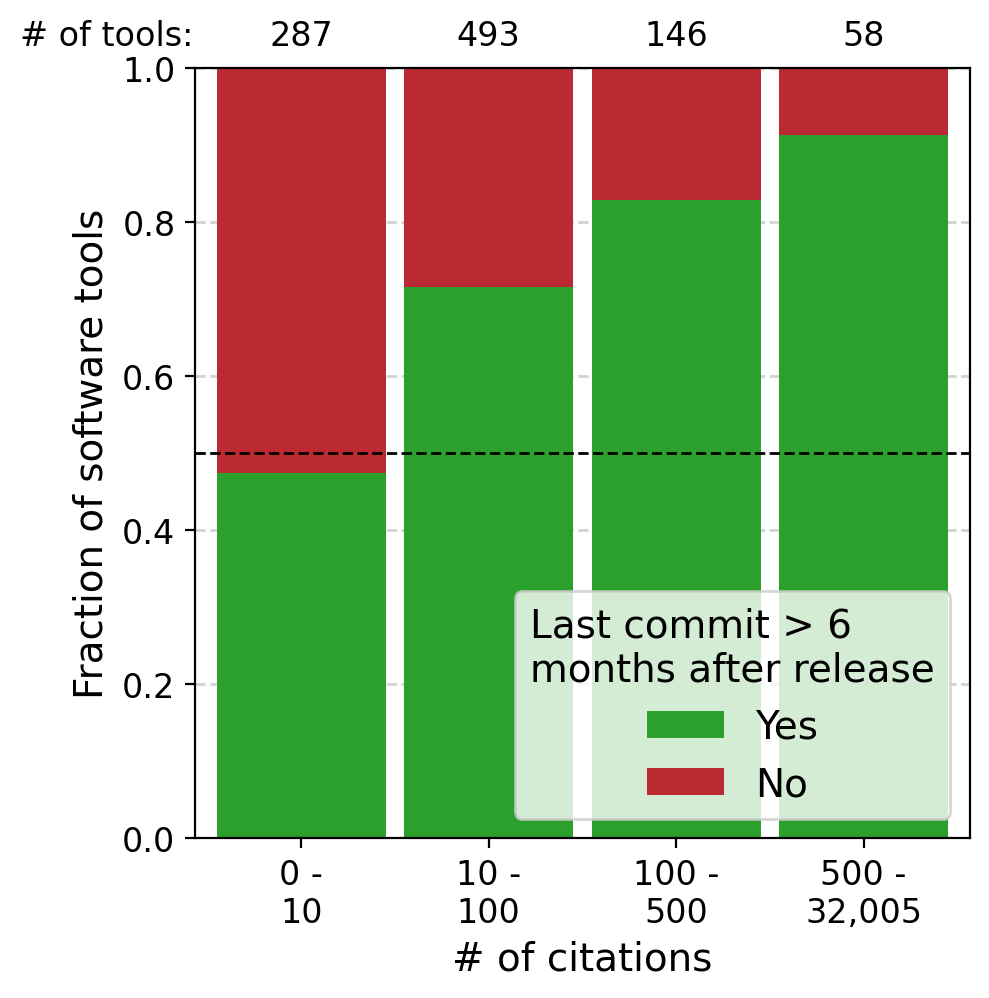

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
fontsize = 14
color1 = "tab:green"
color2 = "#bb2a33"
width = 0.9

ranges = [
    [0, 10],
    [10, 100],
    [100, 500],
    [500, np.max(df_commits_plot["citations"].astype(int))],
]

for i, range in enumerate(ranges):
  total = len(df_commits_plot[(df_commits_plot["citations"].astype(int) >= range[0]) & (df_commits_plot["citations"].astype(int) < range[1])])

  y1 = len(df_commits_plot[(df_commits_plot["6_months_apart"] == True) & (df_commits_plot["citations"].astype(int) >= range[0]) & (df_commits_plot["citations"].astype(int) < range[1])]) / total
  print(y1)
  ax.bar(i, y1, color=color1, label="Yes" if i==0 else None, width=width)

  y2 = len(df_commits_plot[(df_commits_plot["6_months_apart"] == False) & (df_commits_plot["citations"].astype(int) >= range[0]) & (df_commits_plot["citations"].astype(int) < range[1])]) / total
  ax.bar(i, y2, bottom=y1, color=color2, label="No" if i==0 else None, width=width)

  # Add total number of tools above bars
  ax.text(i, 1.03, total, fontsize=fontsize-2, ha="center")

ax.text(-1.5, 1.03, "# of tools:", fontsize=fontsize-2)

ax.set_ylim(0,1)

ax.legend(title="Last commit > 6\nmonths after release", fontsize=fontsize, title_fontsize=fontsize, loc="lower right")

ax.set_xticks(np.arange(len(ranges)), [" -\n".join([str('{:,}'.format(int(i[0]))), str('{:,}'.format(int(i[1])))]) for i in ranges])
ax.set_ylabel("Fraction of software tools", fontsize=fontsize)
ax.set_xlabel("# of citations", fontsize=fontsize)

ax.tick_params(axis="both", labelsize=fontsize-2)
ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.margins(x=0.03)

ax.axhline(0.5, lw=1, color="black", ls="--")

fig.savefig("software_update.png", dpi=300, bbox_inches="tight")

fig.show()